In [1]:
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
from tqdm import trange
from dataclasses import dataclass
import csv

In [2]:
from module import *

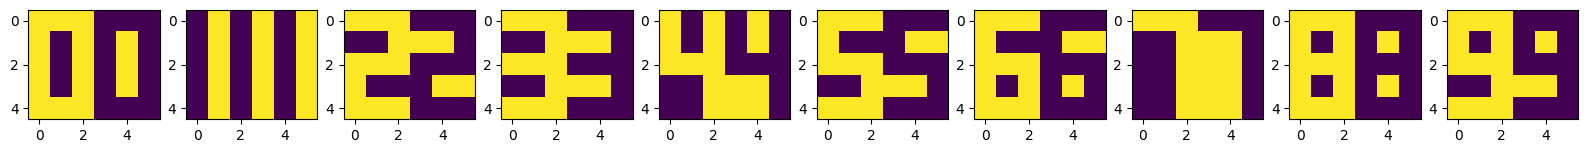

In [3]:
data_rows = {
    "e":  {0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1},
    "r":  {0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 0},
    "c":  {0: 0, 1: 1, 2: 0, 3: 1, 4: 0, 5: 1},
    "cr": {0: 0, 1: 1, 2: 1, 3: 1, 4: 0, 5: 0},
    "l":  {0: 1, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1},
    "lr": {0: 1, 1: 0, 2: 1, 3: 0, 4: 1, 5: 0},
    "lc": {0: 1, 1: 1, 2: 0, 3: 0, 4: 0, 5: 1},
    "f":  {0: 1, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0},
    "off":{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
}
numbers = {
    0: "f lr lr lr f",
    1: "c c c c c",
    2: "f r f l f",
    3: "f r f r f",
    4: "lr lr f r r",
    5: "f l f r f",
    6: "f l f lr f",
    7: "f r r r r",
    8: "f lr f lr f",
    9: "f lr f r f",
}
empty = np.array([[0,0,0,1,1,1],[0,0,0,1,1,1],[0,0,0,1,1,1],[0,0,0,1,1,1],[0,0,0,1,1,1]])

numbers_rows = {k: [data_rows[vv] for vv in v.split(" ")] for k, v in numbers.items()}

fig, axs = plt.subplots(1, 10, figsize=(20,20))
for ax, n in zip(axs, numbers_rows.values()):
    ax.imshow(pd.DataFrame(n).values)

In [4]:
def draw_network(net):
    import networkx as nx
    edges = []
    pos = {}
    n_in = {}
    for node, (_, priority, listen, cast, __) in net.nodes.iterrows():
        if listen is not None:
            try:
                iter(listen)
            except:
                listen = [listen]
            for l in listen:
                edges.append((l, node))
        if cast is not None:
            try:
                iter(cast)
            except:
                cast = [cast]
            for c in cast:
                edges.append((node, c))
        if priority not in n_in:
            n_in[priority] = 0
        pos[node] = (priority, n_in[priority])
        n_in[priority] += 0.5
    G = nx.DiGraph()
    G.add_edges_from(edges)
    plt.figure(figsize=(15,15))
    options = {
        "font_size": 12,
        "node_size": 300,
        "node_color": "white",
        "edgecolors": "blue",
        "linewidths": 2,
        "width": 2,
        "connectionstyle": 'arc3, rad = 0.3'
    }
    ax = plt.gca()
    ax.margins(0.20)
    plt.axis("off")
    nx.draw_networkx(G, pos, **options)
    plt.show()

In [5]:
params_dendrites = {
    "tau_leak": 1, 
    "tau_inhibitory": 1,
    "tau_refractory": 6,
    "tau_ltp": 2, 
    "thres": 1000,
    "ainc": 5, 
    "adec": -1, 
    "wmax": 255, 
    "wmin": 1,
    "learning": True,
    "wta": True,
}

net = SpikeNetworkSim(inputs_l=6, dt=1)
dendrites = [
    {
        "connections":{
            0: [0, 1],
            1: [0, 1],
            2: [0, 1],
            3: [0, 1],
            4: [0, 1],
            5: [0, 1],
        }, "weights": {
            0: {0: 280, 1: 240},
            1: {0: 0, 1: 0},
            2: {0: 280, 1: 240},
            3: {0: 240, 1: 240},
            4: {0: 270, 1: 255},
            5: {0: 0, 1: 0},
        }
    }, {
        "connections":{
            0: [0, 1],
            1: [0, 1],
            2: [0, 1],
            3: [0, 1],
            4: [0, 1],
            5: [0, 1],
        }, "weights": {
            0: {0: 230, 1: 230},
            1: {0: 0, 1: 230},
            2: {0: 0, 1: 230},
            3: {0: 0, 1: 0},
            4: {0: 230, 1: 0},
            5: {0: 230, 1: 0},
        }
    }, {
        "connections":{
            0: [0, 1],
            1: [0, 1],
            2: [0, 1],
            3: [0, 1],
            4: [0, 1],
            5: [0, 1],
        }, "weights": {
            0: {0: 300, 1: 270},
            1: {0: 0, 1: 270},
            2: {0: 0, 1: 270},
            3: {0: 0, 1: 0},
            4: {0: 300, 1: 0},
            5: {0: 300, 1: 0},
        }
    }, {
        "connections":{
            0: [0, 1],
            1: [0, 1],
            2: [0, 1],
            3: [0, 1],
            4: [0, 1],
            5: [0, 1],
        }, "weights": {
            0: {0: 0, 1: 240},
            1: {0: 255, 1: 255},
            2: {0: 0, 1: 200},
            3: {0: 255, 1: 255},
            4: {0: 200, 1: 0},
            5: {0: 200, 1: 255},
        }
    }, 
]
teacher_nodes = net.ttron_layer([d["connections"] for d in dendrites], **params_dendrites)

In [6]:
net.nodes

,type,priority,listening,broadcasting
0,input,0,None,None
1,input,0,None,None
2,input,0,None,None
3,input,0,None,None
4,input,0,None,None
5,input,0,None,None
6,buffer,1,0,None
7,buffer,1,1,None
8,buffer,1,2,None
9,buffer,1,3,None


In [12]:
seq_data = []
seq_labels = []
a = None
for n in range(1):
        a = np.random.randint(10)
        seq_data+=[x.copy() for x in numbers_rows[a]]
        seq_labels+=[a for _ in numbers_rows[a]]
        for i in range(5):
            seq_labels.append(-1)
            seq_data.append(data_rows["off"].copy())

genome = {}
for x in np.unique(seq_labels):
    genome[x] = np.random.randint(len(teacher_nodes))
print(genome)
d_p = seq_labels[0]
for i, d in enumerate(seq_labels):
    seq_data[i].update({k:0 for k in teacher_nodes})
    if d != d_p:
        seq_data[i][teacher_nodes[genome[d]]] = 1
        d_p = d
    print(seq_data[i])

{-1: 2, 3: 3}
{0: 1, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0, 24: 0, 30: 0, 36: 0, 42: 0}
{0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 0, 24: 0, 30: 0, 36: 0, 42: 0}
{0: 1, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0, 24: 0, 30: 0, 36: 0, 42: 0}
{0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 0, 24: 0, 30: 0, 36: 0, 42: 0}
{0: 1, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0, 24: 0, 30: 0, 36: 0, 42: 0}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 42: 0, 24: 0, 30: 0, 36: 1}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 42: 0, 24: 0, 30: 0, 36: 0}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 42: 0, 24: 0, 30: 0, 36: 0}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 42: 0, 24: 0, 30: 0, 36: 0}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 42: 0, 24: 0, 30: 0, 36: 0}


[{0: 1, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0, 24: 0, 30: 0, 36: 0, 42: 0},
 {0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 0, 24: 0, 30: 0, 36: 0, 42: 0},
 {0: 1, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0, 24: 0, 30: 0, 36: 0, 42: 0},
 {0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 0, 24: 0, 30: 0, 36: 0, 42: 0},
 {0: 1, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0, 24: 0, 30: 0, 36: 0, 42: 0},
 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 42: 0, 24: 0, 30: 0, 36: 1},
 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 42: 0, 24: 0, 30: 0, 36: 0},
 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 42: 0, 24: 0, 30: 0, 36: 0},
 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 42: 0, 24: 0, 30: 0, 36: 0},
 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 42: 0, 24: 0, 30: 0, 36: 0}]

In [ ]:
test[0].copy()